 # <font color='blue'> Building Machine Learning Model using Python.</font>
 # PADS Smartwatch Dataset and Early detection of Parkinson's disease

#  InsightsAnalysts24_Prediction_Model

**Team Members**


1.   Archana Mukthavaram
2.   Jothi Arumugam
3.   Poornima Karthik
4.   Saranya Devi
5.   Surya Kalyanaraman



In [ ]:
# Importing the NumPy library with the alias 'np'
import numpy as np

# Importing the Pandas library with the alias 'pd'
import pandas as pd

# Importing the seaborn library with the alias 'sns'
import seaborn as sns

# Importing the matplot library with the alias 'plt'
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

print("Libraries Imported...")


Libraries Imported...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get the timeseries data as a vector for each wrist
<font color = 'blue'> This way, we will have only 2 rows for each patient's data
We have filtered the data to get the accelerometer and gyroscope readings with a sampling_rate of 50 </font>

In [ ]:
import os
import pandas as pd
import numpy as np
import json

final_df=pd.DataFrame()
dirpath = '/content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/movement/'

cols = ['T','A_X','A_Y','A_Z','G_X','G_Y','G_Z']
rows = 1023

col_names = []
for i in range (0,rows//2):
  for j in range(0,len(cols)):
    col_names.append(cols[j] + str(i))


# Iterate through all JSON files in the specified folder
for filename in os.listdir(dirpath):
  if filename.endswith(".json"):
    filepath = os.path.join(dirpath, filename)
    with open(filepath, 'r') as f:
      try:
        data = json.load(f)

        data_list = data['session']
        for item in range(0,11):
          task = data_list[item]['record_name']
          file_L = dirpath + data_list[item]['records'][0]['file_name']
          print('Processing file : ',file_L)
          file_R = dirpath + data_list[item]['records'][1]['file_name']
          left_df = pd.read_csv(file_L,header=None, names=cols)
          right_df = pd.read_csv(file_R,header=None,names=cols)
          filtered_df_L = pd.DataFrame()
          for i in range(0,rows,2):
            filtered_df_L = pd.concat([filtered_df_L,left_df.iloc[i,:].to_frame().T],axis = 0)
            filtered_df_L = filtered_df_L.reset_index(drop = True)
          filtered_df_R = pd.DataFrame()
          for i in range(0,rows,2):
            filtered_df_R = pd.concat([filtered_df_R,left_df.iloc[i,:].to_frame().T],axis = 0)
            filtered_df_R = filtered_df_R.reset_index(drop = True)

        flatten_arry_L = np.array(filtered_df_L).flatten()
        flatten_arry_R = np.array(filtered_df_R).flatten()

        left_df = pd.DataFrame([flatten_arry_L],columns = col_names)
        left_df['Wrist'] = 'Left'
        right_df = pd.DataFrame([flatten_arry_R],columns = col_names)
        right_df['Wrist'] = 'Right'
        left_df['Patient_id'] = right_df['Patient_id'] = data['subject_id']
        final_df = pd.concat([final_df,left_df,right_df],axis=0)

      except json.JSONDecodeError:
        print(f"Error decoding JSON in file: {filename}")
        continue
final_df.shape

Streaming output truncated to the last 5000 lines.
Processing file :  /content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/movement/timeseries/021_PointFinger_LeftWrist.txt
Processing file :  /content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/movement/timeseries/021_DrinkGlas_LeftWrist.txt
Processing file :  /content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/movement/timeseries/021_CrossArms_LeftWrist.txt
Processing file :  /content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/movement/timeseries/021_TouchIndex_LeftWrist.txt
Processing file :  /content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/movement/timeseries/021_TouchNose_LeftWrist.txt
Processing file :  /content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/movement/timeseries/021_Entrainment_LeftWrist.txt
Processing file :  /content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/movement/timeseries/020_Relaxed_LeftWrist.txt
Processing file :  /content/drive/My Drive/

(938, 3502)

In [ ]:
final_df.shape

(938, 3502)

In [ ]:
final_df.to_csv('/content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/Pads_data_Prediction.csv',index=False)

In [ ]:
times_df = pd.read_csv('/content/drive/My Drive/Insights_Analysts_Team24/Pads_Dataset/Pads_data_Prediction.csv')
times_df.shape

(938, 3502)

In [ ]:
patients_df = pd.read_csv('/content/drive/My Drive/Insights_Analysts_Team24/Files for visualization/Patient_Info.csv')
patients_df=patients_df.rename(columns={'Participant_id':'Patient_id'})
ppatients_df = patients_df.drop(columns=['Appearance_in_kinship','Appearance_in_first_grade_kinship'],inplace=True)
patients_df.shape

(469, 39)

**Merge the two dataframes**

In [ ]:
pads_df = patients_df.merge(times_df,on='Patient_id')
pads_df.shape

(938, 3540)

**Change Patient_id to 'str' type, so that it will remain as category during prediction**

In [ ]:
pads_df['Patient_id'] = pads_df['Patient_id'].astype('str')

In [ ]:
# check for null values
pd.set_option('display.max_rows',None)
pads_df.isnull().sum()

,0
Patient_id,0
Age,0
Age_at_diagnosis,0
Gender,0
Height,0
Weight_x,0
Handedness,0
Condition,0
Effect_of_alcohol_on_tremor,0
Swallowing,0


In [ ]:
# check for duplicate rows
#check for duplicate rows
duplicates = pads_df.duplicated()
duplicated_rows = duplicates.sum()
print("Number of duplicated rows : ",duplicated_rows)

Number of duplicated rows :  0


In [ ]:
obj_cols = pads_df.select_dtypes(include=['object']).columns
pads_df[obj_cols] = pads_df[obj_cols].astype('category')

**Label Encoding**

<font color = 'blue'>In scikit-learn, the LabelEncoder is a utility class that is used to encode categorical (nominal) labels into numerical labels. Categorical labels are non-numeric labels, such as classes or categories, which are often encountered in machine learning tasks. </font>

In [ ]:
categorical_columns = list(pads_df.select_dtypes(include=['category']).columns)
numerical_columns = list(pads_df.select_dtypes(include=['int8','int64', 'float64']).columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in categorical_columns:
    pads_df[i] = label_encoder.fit_transform( pads_df[i])

#All categorical columns encoded to numerical values using label encoding
pads_df[categorical_columns].head(10)

,Patient_id,Gender,Handedness,Condition,Effect_of_alcohol_on_tremor,Wrist
0,0,1,1,2,2,0
1,0,1,1,2,2,1
2,111,1,1,4,1,0
3,111,1,1,4,1,1
4,222,0,1,2,2,0
5,222,0,1,2,2,1
6,333,0,1,6,1,0
7,333,0,1,6,1,1
8,414,1,0,9,2,0
9,414,1,0,9,2,1


**Define the features and target for prediction**

In [ ]:
features_df = pads_df.drop(['Condition'],axis=1)
target_df = pads_df[['Condition']]

**Create the train and test data frames to use with the prediction algorithms**

In [ ]:
import sys
import subprocess

# Install the necessary package without specifying 'sklearn'
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'scikit-learn'])

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming features_df and target_df are defined elsewhere in your code
X = features_df
y = target_df

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# print the shape of the train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 3539)
(750, 1)
(188, 3539)
(188, 1)


In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# apply standardization on numerical features
for i in numerical_columns:

    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])

    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])

    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

## Machine Learning Model

<font color = 'blue'> Model Building for "Early detection of Parkinson's Disease" </font>

## XGB Classifer
<font color='blue'>
XGBoost (eXtreme Gradient Boosting) is a machine learning classifier that uses gradient boosted decision trees to solve problems.

1. It is an iterative process that adds trees to correct errors made by previous trees.
2. The final prediction is the sum of predictions from all trees.
3. It uses regularization techniques to avoid overfitting.
4. It can handle large datasets and missing values. </font>

**** ACCURACY_SCORE **** 

 0.8191489361702128 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      0.60      0.67        10
           2       0.87      0.93      0.90        28
           3       1.00      0.71      0.83         7
           4       1.00      0.83      0.90        23
           5       1.00      0.50      0.67         8
           6       0.78      0.78      0.78        18
           7       0.69      0.87      0.77        31
           8       0.78      0.82      0.80        34
           9       0.82      0.82      0.82        22

    accuracy                           0.82       188
   macro avg       0.87      0.79      0.81       188
weighted avg       0.83      0.82      0.82       188
 

**** CONFUSION MATRIX ****


<Axes: >

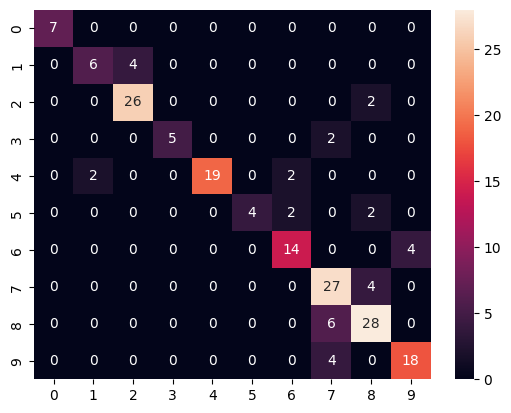

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
accuracy_gb = accuracy_score(y_test, y_pred)
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

## SVM

<font color='blue'>
A support vector machine (SVM) is a supervised machine learning algorithm that classifies data by finding a hyperplane that separates classes.

1. SVMs use a technique called the kernel trick to transform data.
2. SVMs find the hyperplane that maximizes the distance between the closest data points of opposite classes. This distance is called the margin.
3. SVMs use the support vectors, which are the data points closest to the hyperplane, to determine the optimal hyperplane. </font>

**** ACCURACY_SCORE **** 

 0.15425531914893617 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        10
           2       0.15      1.00      0.26        28
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00        34
           9       1.00      0.05      0.09        22

    accuracy                           0.15       188
   macro avg       0.11      0.10      0.03       188
weighted avg       0.14      0.15      0.05       188
 

**** CONFUSION MATRIX ****


<Axes: >

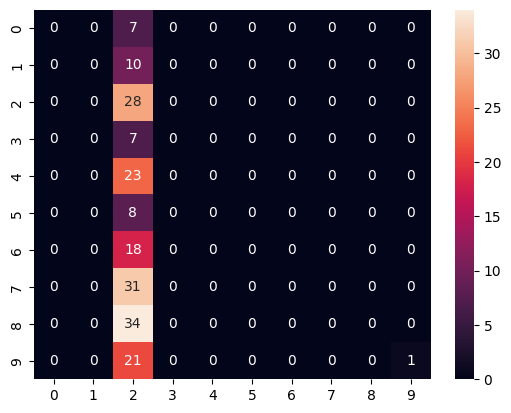

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
accuracy_svm =accuracy_score(y_test, y_pred)
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

## Random Forest Classifer
<font color='blue'>
The random forest is a supervised learning algorithm that combines the predictions of multiple decision trees to produce a more accurate final prediction.

1. <B>Generate multiple decision trees:</B> For each tree, randomly select a subset of data points from the training set (bootstrapping) and a random subset of features to consider at each split.
2. <B>Train each decision tree: </B>Train each decision tree independently on its respective data subset.
3. <B>Make predictions:</B> When predicting on new data, each tree in the forest makes a prediction, and the final prediction is typically the average (for regression) or the majority vote (for classification) across all trees.
</font>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
accuracy_rf = accuracy_score(y_test, y_pred)
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')

**** ACCURACY_SCORE **** 

 0.7978723404255319 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.60      0.75        10
           2       0.65      0.93      0.76        28
           3       1.00      0.71      0.83         7
           4       0.90      0.83      0.86        23
           5       1.00      0.50      0.67         8
           6       0.78      0.78      0.78        18
           7       0.74      0.74      0.74        31
           8       0.78      0.82      0.80        34
           9       0.90      0.82      0.86        22

    accuracy                           0.80       188
   macro avg       0.88      0.77      0.81       188
weighted avg       0.82      0.80      0.80       188
 

**** CONFUSION MATRIX ****


## KNN Classifier
<font color='blue'>
K-Nearest Neighbors (KNN) is a machine learning algorithm that uses a data point's closest neighbors to make predictions.

1. Identify the k-nearest neighbors of a query point
2. Use the neighbors to form decision boundaries that partition query points into regions
3. Use the decision boundaries to make predictions
</font>

**** ACCURACY_SCORE **** 

 0.776595744680851 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.37      1.00      0.54         7
           1       1.00      0.60      0.75        10
           2       0.91      0.71      0.80        28
           3       1.00      0.71      0.83         7
           4       1.00      0.83      0.90        23
           5       0.40      0.50      0.44         8
           6       0.70      0.78      0.74        18
           7       0.81      0.81      0.81        31
           8       0.82      0.82      0.82        34
           9       0.82      0.82      0.82        22

    accuracy                           0.78       188
   macro avg       0.78      0.76      0.75       188
weighted avg       0.82      0.78      0.79       188
 

**** CONFUSION MATRIX ****


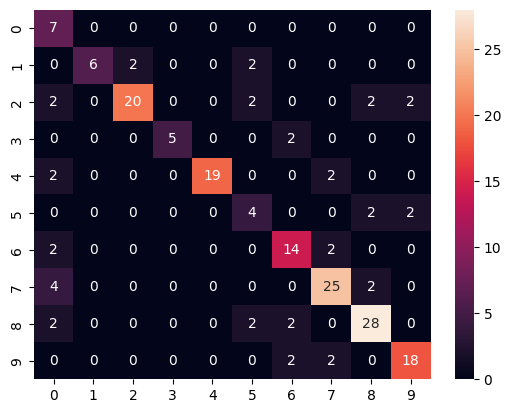

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)  # You can adjust the number of neighbors as needed
knn_classifier.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

#  Evaluate the model
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
accuracy_knn = accuracy_score(y_test, y_pred)
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')

# Display the confusion matrix using Seaborn's heatmap
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

## Logistic Regression
<font color='blue'>
Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.

1. Linear Combination:
The model calculates a linear combination of the input features, similar to linear regression.
2. Sigmoid Transformation:
The linear combination is then passed through the sigmoid function, which outputs a value between 0 and 1 representing the probability of the positive class.
3. Prediction:
Based on a predefined threshold (usually 0.5), the model classifies the data point as belonging to the positive or negative class.
</font>

**** ACCURACY_SCORE **** 

 0.6914893617021277 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.60      0.75        10
           2       0.70      0.75      0.72        28
           3       0.60      0.43      0.50         7
           4       0.64      0.70      0.67        23
           5       0.67      0.50      0.57         8
           6       0.41      0.50      0.45        18
           7       0.76      0.84      0.80        31
           8       0.69      0.71      0.70        34
           9       0.79      0.68      0.73        22

    accuracy                           0.69       188
   macro avg       0.73      0.66      0.68       188
weighted avg       0.71      0.69      0.69       188
 

**** CONFUSION MATRIX ****


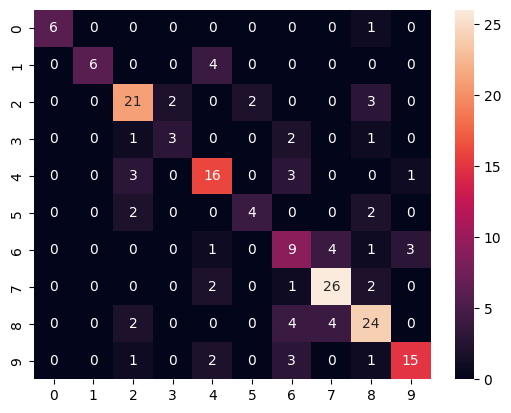

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)

#  Evaluate the model
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')

# Display the confusion matrix using Seaborn's heatmap
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

## Random Forest Regressor
<font color='blue'>
Random Forest Regression works by creating a large number of decision trees, each trained on a random subset of the data, and then averaging the predictions from all these trees to arrive at a final prediction.

1. <B>Data Sampling:</B>
Randomly select a subset of the training data (with replacement) to create a bootstrap sample for each individual decision tree.
2. <B>Feature Selection:</B>
At each node in the decision tree, randomly select a subset of features to consider for splitting. </B>
3. <B>Decision Tree Building:</B>
Build a decision tree using the selected features and the bootstrap sample, following the standard decision tree algorithm to find the best split at each node.
4. <B>Repeat:</B>
Repeat steps 1-3 to create a large number of decision trees, forming the "random forest".
5. <B>Prediction:</B>
For a new data point, each tree in the forest makes a prediction, and the final prediction is the average of all these individual predictions.

The Accuracy using tuned parameter for Random Forest Regression is 0.2553191489361702



Claasifiation Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        10
           2       0.09      0.04      0.05        28
           3       0.10      0.29      0.14         7
           4       0.47      0.78      0.59        23
           5       0.10      0.38      0.15         8
           6       0.26      0.44      0.33        18
           7       0.25      0.32      0.28        31
           8       0.40      0.18      0.24        34
           9       0.00      0.00      0.00        22

    accuracy                           0.26       188
   macro avg       0.17      0.24      0.18       188
weighted avg       0.22      0.26      0.21       188



Confusion Matrix:



<Axes: >

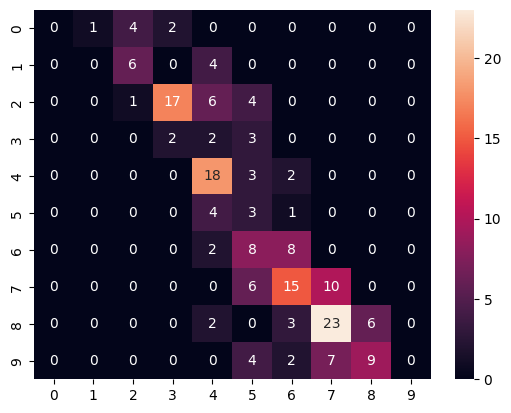

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_tuned = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf_reg_tuned.fit(X_train, y_train)
pred_rf_tuned = rf_reg_tuned.predict(X_test).round()
accuracy_rf_tuned =accuracy_score(y_test, pred_rf_tuned)
print(f"The Accuracy using tuned parameter for Random Forest Regression is {accuracy_rf_tuned}\n")
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_rf_tuned))
print("\n\nConfusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, pred_rf_tuned), annot=True, fmt='d')

## Gradient Boosing Regressor
<font color='blue'>
A Gradient Boosting Regressor is a machine learning algorithm that builds a predictive model by sequentially adding weak learners, typically decision trees, where each new tree focuses on correcting the errors made by the previous trees, effectively minimizing the residuals (differences between actual and predicted values) to achieve a more accurate prediction.

1. <B>Initialization:</B>
Start by making a simple initial prediction, usually the mean of the target values.
2. <B>Calculate residuals:</B>
For each data point, calculate the difference between the actual target value and the current prediction (residuals).
3. <B>Fit a weak learner:</B>
Train a decision tree on the calculated residuals, where the tree tries to learn the patterns in the errors made by the previous model.
4. <B>Update prediction:</B>
Add the new tree's prediction (scaled by a learning rate) to the existing prediction, effectively adjusting the model to better fit the data.
5. <B>Iterate:</B>
Repeat steps 2-4, adding new decision trees to the ensemble until a stopping criterion is met (e.g., maximum number of trees or minimum improvement).

The Accuracy using tuned parameter for Gradient Boosting is 0.7659574468085106



Claasifiation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.60      0.75        10
           2       0.91      0.71      0.80        28
           3       0.33      0.71      0.45         7
           4       0.76      0.83      0.79        23
           5       0.50      0.50      0.50         8
           6       0.43      0.67      0.52        18
           7       0.81      0.81      0.81        31
           8       1.00      0.88      0.94        34
           9       1.00      0.73      0.84        22

    accuracy                           0.77       188
   macro avg       0.77      0.74      0.74       188
weighted avg       0.82      0.77      0.78       188



Confusion Matrix:



<Axes: >

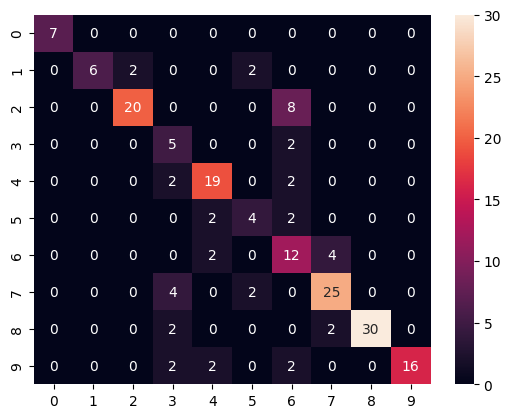

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg_tuned = GradientBoostingRegressor(n_estimators=98,learning_rate=0.1388888888888889,max_depth=8,random_state=42)
gb_reg_tuned.fit(X_train, y_train)
pred_gb_tuned= gb_reg_tuned.predict(X_test).round()
accuracy_gb_tuned =accuracy_score(y_test, pred_gb_tuned)
print(f"The Accuracy using tuned parameter for Gradient Boosting is {accuracy_gb_tuned}\n")
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_gb_tuned))
print("\n\nConfusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, pred_gb_tuned), annot=True, fmt='d')

## Comparing results

In [ ]:
Results = pd.DataFrame(
    {
        'Algorithms': ['Random Forest','XGB','svm','knn','Tuned Random Forest','Tuned Gradient Boost'],
        'Accuracy': [accuracy_rf,accuracy_gb,accuracy_svm,accuracy_knn,accuracy_rf_tuned,accuracy_gb_tuned,]
    }
)
Results

,Algorithms,Accuracy
0,Random Forest,0.797872
1,XGB,0.819149
2,svm,0.154255
3,knn,0.776596
4,Tuned Random Forest,0.255319
5,Tuned Gradient Boost,0.765957


# Conclusion

# <font color='green'> <b><center>Based on the above results, best prediction model for our dataset is XGB algorithm with prediction accuracy of 81.9%. </center> </b></font>

#### <font color='blue'> Consolidated prediction results by using the timeseries data with a sampling rate of 25 </font>

In [ ]:
# Prediction results using 25% of the timeseries data
Results = pd.DataFrame(
    {
        'Algorithms': ['Random Forest','XGB','svm','knn','Tuned Random Forest','Tuned Gradient Boost'],
        'Accuracy': [accuracy_rf,accuracy_gb,accuracy_svm,accuracy_knn,accuracy_rf_tuned,accuracy_gb_tuned,]
    }
)
Results

,Algorithms,Accuracy
0,Random Forest,0.787234
1,XGB,0.787234
2,svm,0.148936
3,knn,0.239362
4,Tuned Random Forest,0.271277
5,Tuned Gradient Boost,0.819149


#### <font color='blue'> Consolidated prediction results by using the timeseries data with a sampling rate of 10 </font>

In [ ]:
# Prediction Results using 10% of the timeseries data
Results = pd.DataFrame(
    {
        'Algorithms': ['Random Forest','XGB','svm','knn','Tuned Random Forest','Tuned Gradient Boost'],
        'Accuracy': [accuracy_rf,accuracy_gb,accuracy_svm,accuracy_knn,accuracy_rf_tuned,accuracy_gb_tuned,]
    }
)
Results

,Algorithms,Accuracy
0,Random Forest,0.787234
1,XGB,0.808511
2,svm,0.148936
3,knn,0.239362
4,Tuned Random Forest,0.265957
5,Tuned Gradient Boost,0.765957


<font color='blue'> We tried creating the prediction model with 50%, 25% and 10% of the timeseries data. This has been taken as vector data.
Shapes of prediction data:
* 50% data - (938, 3540)
* 25% data - (938, 1790)
* 10% data - (938, 740)
</font>